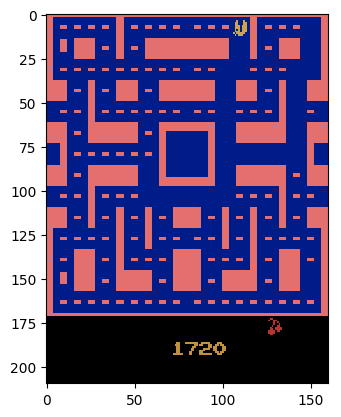

True


In [24]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MsPacman-v0")
#env.reset()
#state = env.step(1)
plt.style.use('default')
plt.imshow(state[0])
plt.show()
print(state[2])

In [2]:
state[0].shape

(210, 160, 3)

In [0]:
from keras.layers import Input, Dense , Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Concatenate
from keras.models import Model, Sequential
from keras import optimizers


kernel_size = 3
steven = Sequential()
steven.add(Conv2D(32, kernel_size = (kernel_size),input_shape = (210, 160, 3)))
steven.add(Activation('relu'))
steven.add(MaxPooling2D(pool_size = (2)))
steven.add(Dropout(0.2))

steven.add(Conv2D(32, kernel_size = (kernel_size)))
steven.add(Activation('relu'))
steven.add(MaxPooling2D(pool_size = (2)))
steven.add(Dropout(0.2))

steven.add(Conv2D(32, kernel_size = (kernel_size)))
steven.add(Activation('relu'))
steven.add(MaxPooling2D(pool_size = (2)))
steven.add(Dropout(0.2))


steven.add(Flatten())
steven.add(Dense(64))
steven.add(Activation('relu'))

steven.add(Dense(5))
steven.add(Activation('softmax'))


adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=1, nesterov=True)

steven.compile(optimizer= adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

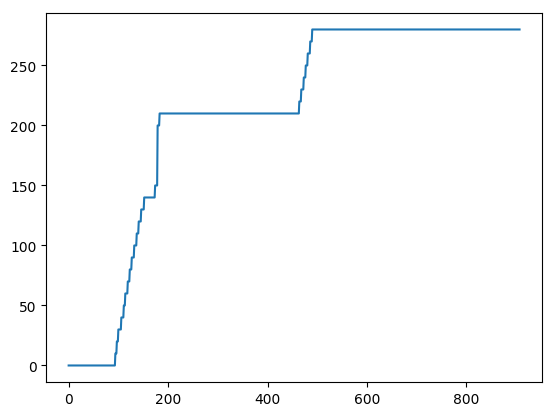

In [26]:
score_record = [0]

env.reset()

state = env.step(1)
for i in range(1000):
  
  screen = state[0]
  score = state[1]
  output = steven.predict(screen.reshape(1,210, 160, 3))
  move = np.argmax(output)
  state = env.step(move)
  score_record.append(score + score_record[-1])
  if state[2] == True:
    break
    
loss = 1/score


score_record = np.array(score_record)
print(state[2])
plt.plot(score_record)
plt.imshow(state[0])
plt.show()

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    
    
    
    self.l1 = nn.Conv2d(in_channels=3, out_channels=1,kernel_size = 3)
    self.l2 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size = 3)
    self.l3 = nn.Linear(51, 8) # 1*38
    
    self.l4 = nn.Linear(304, 8) # 1*38
  def forward(self,state):
    
    x = state[0]## picture
    x = x.swapaxes(2,0)#swap for depth
    x = torch.tensor(x, dtype = torch.float).view(1,3, 160, 210)
    # process raw output to  something this can eat
    
    x = self.l1(x)
    x = F.max_pool2d(x, 2)
    x = F.relu(x) 
    x = self.l2(x)
    x = F.max_pool2d(x, 2) 
    x = F.relu(x)
    x = self.l3(x)
    x = x.view(304)
    x = self.l4(x)
    x = torch.softmax(x,0)

    return x
  
jerry = Model()

In [0]:
optimizer = torch.optim.Adam(jerry.parameters(),lr = 0.1)

tensor(1., requires_grad=True)
False


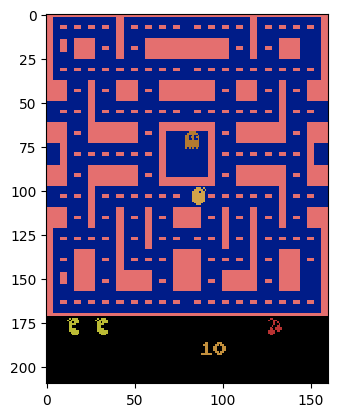

In [70]:
score_record = [0]

env.reset()

state = env.step(1)
for i in range(100):
  
  screen = state[0]
  score = state[1]
  out = jerry.forward(state).detach().numpy()
  out = np.argmax(out)
  state = env.step(out)
  score_record.append(score + score_record[-1])
  if state[2] == True:
    break
  if i%100 == 0:
    
    loss = torch.tensor(1/(score+1),requires_grad=True)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(loss)
score_record = np.array(score_record)
print(state[2])
plt.imshow(state[0])
plt.show()

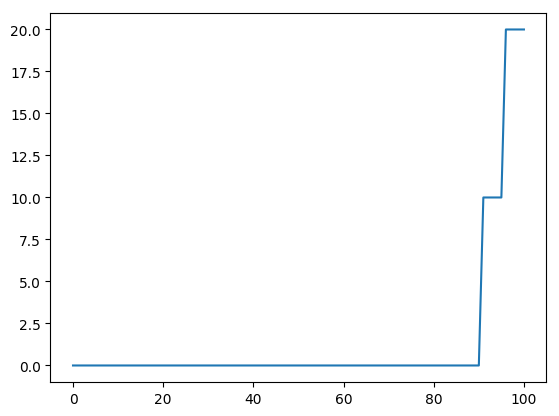

In [65]:
plt.plot(score_record)
